<img src='img/fastcamp_h.png'>

# 8강. CNN Motivation Basic

# 이번장에서 배우는 것들
* Convolutional neural network의 개념과 용어
* Image classification with CNN
* Data augmentation
* 유명 CNN Model의 몇가지 종류와 특징
 * Alexnet
 * VGG16
 * Resnet

# 왜 데이터의 변화에 약할까?

* 1차원으로 데이터를 vectorize하면서 위치 정보를 잃어버림
* 학습데이터에서 주어진 모든 픽셀의 값에 대한 통계적 계산을 하면서 y를 예측할 뿐임
<img src='img/08_03.png' height=30% width=30%>

# Receptive field; 사람에게서 배움

* 사람은 사진을 볼때 전체적으로, 작은 영역을 집중해서, 주변 그림을 조합하여 인식함
* 또한 사람이 사물을 볼때, 뉴런 중 일부분만 활성화 됨을 발견
* 위의 사항을 고려하여 모델을 만들면 어떨까? 하는 관점에서 등장한 것이 CNN

<img src='img/08_04.png' height=50% width=50%>

# CNN의 구조

<img src='img/08_05.png' height=80% width=80%>

## 입력 데이터 $X$
 * $x \in X$는 더 이상 1차원 벡터가 아님
 * 흑백 이미지라면 height x width 크기의 matrix
 * 칼라 이미지라면 height x width x channel 크기의 tensor



# CNN의 구조

<img src='img/08_05.png' height=80% width=80%>

## Kernel
 * 각 레이어 마다 존재 하는 작은 사이즈의 사각형
 * 임의의 h,w를 정하여 그 영역에서 perceptron 연산을 함 (CNN에서 학습 대상이 되는 weight)

## Conv Layer 혹은 Conv Block
 * 중간 중간 사각기둥 같은 모양들이 conv layer/block가 됨

# CNN 용어 및 동작

* 다음과 같은 동작으로 Kernel을 통하여 conv가 쌓여져감
* 파란색 부분: 이전 레이어에서 넘어온 출력값
* 회색 부분: 이번 레이어에서의 출력값

## Conv & Stride
* kernel과 해당하는 인풋의 percetron 연산을 conv 라고 부름
* 3x3 kernel이 옆으로, 밑으로 1칸씩 이동하고 있음
* 이러한 이동 동작을 stride라고 함, 예제에서 stride는 1x1, output channel은 1임

<center><img src='img/08_01.gif' height=30% width=30%></center>


## Conv & Stride

$$ k = \begin{bmatrix}
 0 & 1 & 2 \\
 2 & 2 & 0 \\
 0 & 1 & 2 \\
\end{bmatrix} \nonumber $$

<center><img src='img/08_02.gif' height=20% width=20%></center>

* 임의의 커널이 다음과 같다고 가정하고 stride =1, 입력 이미지 5 x 5라고 가정
* 파란색이 입력 이미지, 초록색이 출력 결과가 됨
* stride의 값에 따라 출력 이미지는 입력이미지보다 작아지게 됨

$$ \sum_{j=0}\sum_{i=0} x_{ij} * k_{ij} = value \nonumber $$

## padding

<center><img src='img/08_03.gif' height=50% width=50%></center>

* stride의 이동 개수에 비례하여 출력이 작아지게 되므로 크기를 유지하기 위하여 가장자리에 0을 채워 넣는 방법
* 위의 경우는 padding이 1x1, stride가 2x2인 경우임

# Kernel이 여러개인 경우

* kernel이 여러개 일 수 있음
* 각 kernel은 순차적으로 conv 동작을 하여 output channel을 쌓아나감
* $kernel_1$의 conv 동작 후 kernel_2가 conv 동작을 하면 같은 크기의 아웃풋이 2겹으로 쌓이게 됨
* 아래의 예제라면 다음과 같음 (kernel size는 3x3, padding이 적용되어 있지 않다고 가정)
* image shape = ($h_1$,$w_1$,1), kernel shape = (3,3,5)
* output channel shape = ($h_2$, $w_2$, $5$)
<center><img src='img/08_09.png' height=50% width=50%></center>

# pooling

* kernel이 커지면 커질 수록 이미지를 전체적으로 볼 수 있으나 연산이 비쌈
* stride를 크게 주면 출력은 작아지네 디테일을 놓치게 됨
* 적절히 output에서 특별한 특징을 추출하기 위한 기법으로 pooling이 등장

## Max pooling & Average pooling

* stride = 2x2, pooling size = 2x2 인 경우
<center><img src='img/08_06.png' height=50% width=50%></center>

# pooling의 의미

* conv 동작은 이미지 출력을 kernel에 따라 변형 시키지만
* pooling은 이미지의 특징을 유지한채 사이즈를 줄임
* 이미지 사이즈를 적절히 줄이면 계산양을 감소 시킬 수 있음

<center><img src='img/08_07.png' height=70% width=70%></center>

# 왜 CNN 인가?

* 현재 영상처리에 관한 딥러닝에서는 CNN을 빼놓고 이야기할 수 가 없음
* receptive field로 인한 영역에 상관없이 높은 검출율을 보임
* alexnet이 출현하며 이전 sota를 약 10% 차이로 누름
* 그후 CNN모델들이 2년마다 sota를 50%씩 성능 개선 시킴

<center><img src='img/08_08.png' height=50% width=50%></center>

# MNIST CNN으로 구현하기

<center><img src='img/08_10.png' height=100% width=100%></center>

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((-1, 28, 28, 1)) /255.
x_test = x_test/255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
hist = model.fit(x_train, y_train, epochs=20, verbose=0)

In [24]:
model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)

10000/10000 [==============================] - 1s 64us/step


[0.0572505596982686, 0.9915]

In [31]:
import matplotlib.pylab as plt
def predictor(img, model):
    x = np.abs(img.reshape(1, 28, 28, 1) - 255) / 255.
    Y = model.predict(x)
    return Y


Y shape: (1, 10)


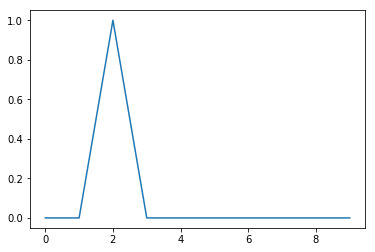

Y argmax: 2


In [32]:
import imageio
my_image_2 = imageio.imread('data/mnist_draw/2.png', as_gray=True)
Y = predictor(my_image_2, model)
print('Y shape:', Y.shape)

plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

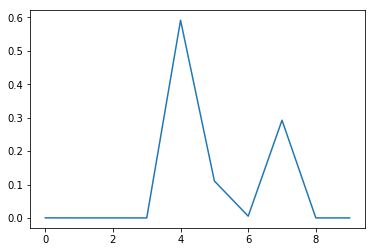

Y argmax: 4


In [37]:
my_image_4 = imageio.imread('data/mnist_draw/4_corner.png', as_gray=True)
Y = predictor(my_image_4, model)
plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

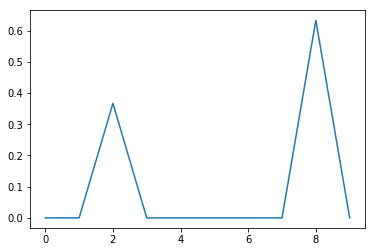

Y argmax: 8


In [39]:
#흑백을 바꾼 경우
Y = predictor(np.abs(my_image_2 - 255), model)
plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

# Data Augmentation

* Deep Learning에 절대적으로 영향을 끼치는 것은 학습셋
* 더 어려운 문제를 학습시키기 위해서는 샘플이 부족함
* 모델의 입장에서는 데이터를 약간 회전시키거나 크기를 변경시키거나 색을 변경하는 방법으로 새로운 학습셋인 척 할 수 있음
* 원본 데이터를 너무 심하게 훼손하지 않는 선에서 변경을 시키는 것을 오그멘티에션이라고 함

<center><img src='img/08_11.png' height=50% width=50%></center>

# Data Augmentation의 종류

* flip (세로 플립, 가로 플립)
<center><img src='img/08_12.png' height=50% width=50%></center>

* rotation
<center><img src='img/08_13.png' height=70% width=70%></center>

* zoom in/out
<center><img src='img/08_14.png' height=50% width=50%></center>

* crop
<center><img src='img/08_15.png' height=50% width=50%></center>

* add noise
<center><img src='img/08_16.png' height=50% width=50%></center>

In [ ]:
# keras augmentation 

ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [42]:
# keras augmentation 

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# augmantation 전 이미지를 flaot으로 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(samplewise_center=True, rotation_range=45, zoom_range=0.3)

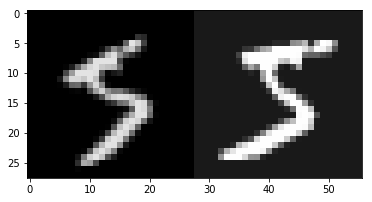

In [52]:
import numpy as np
augmented = next(datagen.flow(X_train[0].reshape((1, 28, 28, 1))))
plt.imshow(np.hstack([augmented.reshape((28,28)), X_train[0]]), cmap='gray')
plt.show()

# 유명 CNN 모델

## alexnet
* 현재의 CNN 돌풍이 있게 한 기념비적 모델
* 힌튼 교수팀이 2012년 ILSVRC(ImageNet Large-Scale Visual Recognition Challenge)에서 1d위(15.4%), 2위와 10% 차이의 정확도를 벌림
* 기념비적 CNN 모델, pooling 개념 도입, dropout 도입

<center><img src='img/08_17.png' height=40% width=40%></center>

## googlenet
* 구글에서 만든 2014년 ILSVRC 1위의 모델, 오차율 (6.7%)
* depthwise conv에 대한 개념 정립

<center><img src='img/08_18.png' height=40% width=40%></center>
<center><img src='img/08_19.png' height=20% width=20%></center>

## vgg16
* 2014년 ILSVRC에서 구글에 밀려 2위를 한 모델
* 2위지만 구조적 간편함, 아름다움때문에 현재도 많이 쓰임, 모델 사이즈가 아주 큼 (500mb)
* 오직 Conv, Maxpooling으로만 이루어짐
<center><img src='img/08_20.png' height=80% width=80%></center>

## resnet
* 2014 ILSVRC에서 오차율 (3.6%)으로 1등으로 사람의 오차 (5%)를 넘어선 모델
* vanishing gradient문제를 skip connection (residual block)이라는 새로운 기법으로 해소함
<center><img src='img/08_21.png' height=100% width=100%></center>

# skip connection (residual block)

* block과 block이 이어지는 부분에서 과거의 입력을 연결하는 기법
* 현재의 모델들은 어떤식으로든 skip connection을 이용하여 vanishing gradient를 해소함

<center><img src='img/08_22.png' height=40% width=40%></center>

# Batch Normalization

* mini batch 단위로 입력의 데이터를 노말라이즈해주는 기법
* z score와 유사한 방식으로 동작함
* 해당 모듈을 사용함으로써 모델 수렴이 훨씬 더 빠르고 안정적으로 동작함이 확인됨
* Dropout과 마찬가지로 layers.BatchNormalization 의 형태로 사용가능
* activation 전이나 뒤에 바로 껴 넣는 방식으로 많이 활용됨

<center><img src='img/08_23.png' height=20% width=20%></center>

# Color 이미지의 구조

* gray 이미지는 Height x Width로 구성된 2차원 배열 0~255로 흑색, 회색, 백색을 표현
* color 이미지는 Height x Width x Channel의 3차원 배열의 구조로 Channel은 각각 Red, Green, Blue의 색을 0~255로 표현함
* RGB 색상이 가장 일반적인 표현일뿐 다른 표현 방법도 존재함

<center><img src='img/08_24.png' height=50% width=50%></center>

# Color 이미지에서의 Conv 동작

* 기존 kernel의 사이즈가 3x3의 영역에서 Conv 연산을 하여 출력 1칸을 만들었다면
* 입체영역에서는 3x3x Channel의 영역에서 Conv 연산을 하여 출력 1칸을 만들어냄
<center><img src='img/08_25.png' height=50% width=50%></center>

# Cifar10 데이터를 이용한 color Image classification

* 6만개의 32x32의 칼라 이미지로 10개의 class를 가지고 있음
* 6000개의 이미지당 1개의 클래스
* 50000개의 학습셋, 10000개의 테스트셋으로 구성됨

<center><img src='img/08_26.png' height=50% width=50%></center>

In [67]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_train[:5], np.max(y_train), np.min(y_train))

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]] 9 0


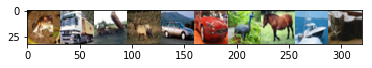

In [62]:
plt.imshow(np.hstack(x_train[:10]))
plt.show()

In [68]:
from keras.utils import to_categorical

x_train = x_train/255.0
x_test = x_test/255.0
y_train = to_categorical(y_train.reshape(-1), 10)
y_test = to_categorical(y_test.reshape(-1), 10)
print(y_test.shape, y_test[:5])

(10000, 10) [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [72]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [73]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_data=(x_test, y_test), verbose=0)

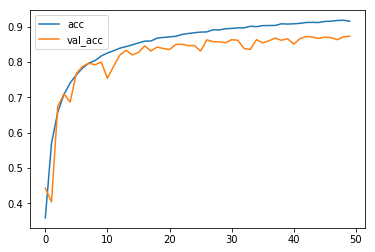

In [76]:
plt.plot(hist.history["acc"], label='acc')
plt.plot(hist.history["val_acc"], label='val_acc')
plt.legend()
plt.show()

In [77]:
model.save_weights('./cifar.h5')

In [81]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
model.load_weights('./cifar.h5')
model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 2s 232us/step


[0.4327749836206436, 0.8729]

In [87]:
print ( np.argmax(model.predict(np.expand_dims(x_test[0], axis=0))), np.argmax(y_test[0]) )
print ( np.argmax(model.predict(np.expand_dims(x_test[1], axis=0))), np.argmax(y_test[1]) )

3 3
8 8
